# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

Importing the  Libraries required for **Data Gathering**

In [1]:
# Required Libraries for Data Gathering
import pandas as pd 
import numpy as np 
import requests 
import tweepy
import json
from timeit import default_timer as timer


**pandas and numpy:** Load ,clean and explore data<br><br>
**requests:** Download file(tsv format) from the given URL <br><br>
**tweepy:** To query Twitter API for Additional Data(retweets and Likes Count in the very least)<br><br>
**json:** Load Parse json Data from Twitter APi  into a list that will be converted to a Dataframe<br><br>
**timeit:** To measure the total execution time taken to query Twitter's API(About 30mins)<br>

The "twitter_archive-enhanced.csv" file was downloaded from this provided
<a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv"> link</a> and uploaded to the project workspace enviromnment 

In [2]:
# loading the twitter_archived_enhannced.csv with pandas 
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
req=requests.get(url)
req

<Response [200]>

In [4]:
url_content = req.content
csv_file = open('tsv-img.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

In [5]:
image_tsv=pd.read_csv('tsv-img.csv',delimiter='\t')
image_tsv.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

**creating an API object  to gather Twitter data.**

In [13]:
import config_file
consumer_key = config_file.api_key
consumer_secret = config_file.api_key_secret
access_token = config_file.access_token
access_secret = config_file.access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


#### Querying Twitter's API for JSON data related to each tweet ID


In [23]:
#index variable with an initial value of -1 so indexing starts from zero
index = -1
#list of tweet_ids that throws a TweepyError
error_ids = []
start = timer()
# Saving each tweet_ids json data to a new line in 'tweet_json.txt' file
with open('tweet_json.txt', 'w') as file:
    # This loop will likely take 20-30 minutes to run
    for tweet_id in twitter_archive.tweet_id:
        index += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success",tweet_id)
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepError:
            error_ids.append(tweet_id)
            pass
end = timer()
print(end - start)

Success 892420643555336193
Success 892177421306343426
Success 891815181378084864
Success 891689557279858688
Success 891327558926688256
Success 891087950875897856
Success 890971913173991426
Success 890729181411237888
Success 890609185150312448
Success 890240255349198849
Success 890006608113172480
Success 889880896479866881
Success 889665388333682689
Success 889638837579907072
Success 889531135344209921
Success 889278841981685760
Success 888917238123831296
Success 888804989199671297
Success 888554962724278272
Success 888078434458587136
Success 887705289381826560
Success 887517139158093824
Success 887473957103951883
Success 887343217045368832
Success 887101392804085760
Success 886983233522544640
Success 886736880519319552
Success 886680336477933568
Success 886366144734445568
Success 886267009285017600
Success 886258384151887873
Success 886054160059072513
Success 885984800019947520
Success 885528943205470208
Success 885518971528720385
Success 885311592912609280
Success 885167619883638784
S

Success 834209720923721728
Success 834167344700198914
Success 834089966724603904
Success 834086379323871233
Success 833863086058651648
Success 833826103416520705
Success 833732339549220864
Success 833722901757046785
Success 833479644947025920
Success 833124694597443584
Success 832998151111966721
Success 832769181346996225
Success 832757312314028032
Success 832682457690300417
Success 832645525019123713
Success 832636094638288896
Success 832397543355072512
Success 832369877331693569
Success 832273440279240704
Success 832215909146226688
Success 832215726631055365
Success 832088576586297345
Success 832040443403784192
Success 832032802820481025
Success 831939777352105988
Success 831926988323639298
Success 831911600680497154
Success 831670449226514432
Success 831650051525054464
Success 831552930092285952
Success 831322785565769729
Success 831315979191906304
Success 831309418084069378
Success 831262627380748289
Success 830956169170665475
Success 830583320585068544
Success 830173239259324417
S

Success 794355576146903043
Success 794332329137291264
Success 794205286408003585
Success 793962221541933056
Success 793845145112371200
Success 793614319594401792
Success 793601777308463104
Success 793500921481273345
Success 793286476301799424
Success 793271401113350145
Success 793256262322548741
Success 793241302385262592
Success 793226087023144960
Success 793210959003287553
Success 793195938047070209
Success 793180763617361921
Success 793165685325201412
Success 793150605191548928
Success 793135492858580992
Success 793120401413079041
Success 792913359805018113
Success 792883833364439040
Success 792773781206999040
Success 792394556390137856
Success 792050063153438720
Success 791821351946420224
Success 791784077045166082
Success 791780927877898241
Success 791774931465953280
Success 791672322847637504
Success 791406955684368384
Success 791312159183634433
Success 791026214425268224
Success 790987426131050500
Success 790946055508652032
Success 790723298204217344
Success 790698755171364864
S

Success 753026973505581056
Success 752932432744185856
Success 752917284578922496
Success 752701944171524096
Success 752682090207055872
Success 752660715232722944
Success 752568224206688256
Success 752519690950500352
Success 752334515931054080
Success 752309394570878976
Success 752173152931807232
Success 751950017322246144
Success 751937170840121344
Success 751830394383790080
Success 751793661361422336
Success 751598357617971201
Success 751583847268179968
Success 751538714308972544
Success 751456908746354688
Success 751251247299190784
Success 751205363882532864
Success 751132876104687617
Success 750868782890057730
Success 750719632563142656
Success 750506206503038976
Success 750429297815552001
Success 750383411068534784
Success 750381685133418496
Success 750147208377409536
Success 750132105863102464
Success 750117059602808832
Success 750101899009982464
Success 750086836815486976
Success 750071704093859840
Success 750056684286914561
Success 750041628174217216
Success 750026558547456000
S

Success 711732680602345472
Success 711694788429553666
Success 711652651650457602
Success 711363825979756544
Success 711306686208872448
Success 711008018775851008
Success 710997087345876993
Success 710844581445812225
Success 710833117892898816
Success 710658690886586372
Success 710609963652087808
Success 710588934686908417
Success 710296729921429505
Success 710283270106132480
Success 710272297844797440
Success 710269109699739648
Success 710153181850935296
Success 710140971284037632
Success 710117014656950272
Success 709918798883774466
Success 709901256215666688
Success 709852847387627521
Success 709566166965075968
Success 709556954897764353
Success 709519240576036864
Success 709449600415961088
Success 709409458133323776
Success 709225125749587968
Success 709207347839836162
Success 709198395643068416
Success 709179584944730112
Success 709158332880297985
Success 709042156699303936
Success 708853462201716736
Success 708845821941387268
Success 708834316713893888
Success 708810915978854401
S

Success 689255633275777024
Success 689154315265683456
Success 689143371370250240
Success 688916208532455424
Success 688908934925697024
Success 688898160958271489
Success 688894073864884227
Success 688828561667567616
Success 688804835492233216
Success 688789766343622656
Success 688547210804498433
Success 688519176466644993
Success 688385280030670848
Success 688211956440801280
Success 688179443353796608
Success 688116655151435777
Success 688064179421470721
Success 687841446767013888
Success 687826841265172480
Success 687818504314159109
Success 687807801670897665
Success 687732144991551489
Success 687704180304273409
Success 687664829264453632
Success 687494652870668288
Success 687480748861947905
Success 687476254459715584
Success 687460506001633280
Success 687399393394311168
Success 687317306314240000
Success 687312378585812992
Success 687127927494963200
Success 687124485711986689
Success 687109925361856513
Success 687102708889812993
Success 687096057537363968
Success 686947101016735744
S

Success 675534494439489536
Success 675531475945709568
Success 675522403582218240
Success 675517828909424640
Success 675501075957489664
Success 675497103322386432
Success 675489971617296384
Success 675483430902214656
Success 675432746517426176
Success 675372240448454658
Success 675362609739206656
Success 675354435921575936
Success 675349384339542016
Success 675334060156301312
Success 675166823650848770
Success 675153376133427200
Success 675149409102012420
Success 675147105808306176
Success 675146535592706048
Success 675145476954566656
Success 675135153782571009
Success 675113801096802304
Success 675111688094527488
Success 675109292475830276
Success 675047298674663426
Success 675015141583413248
Success 675006312288268288
Success 675003128568291329
Success 674999807681908736
Success 674805413498527744
Success 674800520222154752
Success 674793399141146624
Success 674790488185167872
Success 674788554665512960
Success 674781762103414784
Success 674774481756377088
Success 674767892831932416
S

Success 669573570759163904
Success 669571471778410496
Success 669567591774625800
Success 669564461267722241
Success 669393256313184256
Success 669375718304980992
Success 669371483794317312
Success 669367896104181761
Success 669363888236994561
Success 669359674819481600
Success 669354382627049472
Success 669353438988365824
Success 669351434509529089
Success 669328503091937280
Success 669327207240699904
Success 669324657376567296
Success 669216679721873412
Success 669214165781868544
Success 669203728096960512
Success 669037058363662336
Success 669015743032369152
Success 669006782128353280
Success 669000397445533696
Success 668994913074286592
Success 668992363537309700
Success 668989615043424256
Success 668988183816871936
Success 668986018524233728
Success 668981893510119424
Success 668979806671884288
Success 668975677807423489
Success 668967877119254528
Success 668960084974809088
Success 668955713004314625
Success 668932921458302977
Success 668902994700836864
Success 668892474547511297
S

In [6]:
# list to append each successful tweet_id json Data
df_lists=[]
with open('tweet_json.txt') as file:
    for tweet_json in file:
        df_lists.append(json.loads(tweet_json))

In [7]:
# Create Dataframe from the list of json Data
df_json=pd.DataFrame(df_lists,columns=['id','favorite_count','retweet_count','is_quote_status','retweeted'])


In [9]:
df_json.head()

,id,favorite_count,retweet_count,is_quote_status,retweeted
0,892420643555336193,33835,7015,False,False
1,892177421306343426,29351,5302,False,False
2,891815181378084864,22070,3483,False,False
3,891689557279858688,36962,7229,False,False
4,891327558926688256,35338,7768,False,False


**Dear Reviewer** <br>
I would have preferred the below approach in querying the Twitter API because it was a solution inspired by the approach we were taught in The Data Gathering phase of this module and i find the approach to be more effective and   comfy with (which worked incredibly well) as opposed to writing the json data to a text file, so in this light ,I'm appealing to you to help explain  why we were required to write to a .txt file when the below approach could be taken or any other approach one could think of.

In [31]:
# #querying 
# df_list = []
# error_ids = []
# index=-1
# for tweet_ids in twitter_archive.tweet_id:
#     index+=1
#     try:
#         tweet = api.get_status(tweet_ids,tweet_mode='extended')
#         tweet_id=tweet.id_str
#         retweets=tweet.retweet_count
#         likes=tweet.favorite_count
#         source=tweet.source
#         date=str(tweet.created_at)
#         df_list.append({'index': int(index),
#                         'tweet_id': tweet_ids,
#                         'retweets': retweets,
#                        'likes':likes,
#                        'source':source,
#                        'date':date})
#         print(tweet.id_str,'success')
#     except tweepy.TweepError:
#         error_ids.append(tweet.id)
#         pass

892420643555336193 success
892177421306343426 success
891815181378084864 success
891689557279858688 success
891327558926688256 success
891087950875897856 success
890971913173991426 success
890729181411237888 success
890609185150312448 success
890240255349198849 success
890006608113172480 success
889880896479866881 success
889665388333682689 success
889638837579907072 success
889531135344209921 success
889278841981685760 success
888917238123831296 success
888804989199671297 success
888554962724278272 success
888078434458587136 success
887705289381826560 success
887517139158093824 success
887473957103951883 success
887343217045368832 success
887101392804085760 success
886983233522544640 success
886736880519319552 success
886680336477933568 success
886366144734445568 success
886267009285017600 success
886258384151887873 success
886054160059072513 success
885984800019947520 success
885528943205470208 success
885518971528720385 success
885311592912609280 success
885167619883638784 success
8

834458053273591808 success
834209720923721728 success
834167344700198914 success
834089966724603904 success
834086379323871233 success
833863086058651648 success
833826103416520705 success
833732339549220864 success
833722901757046785 success
833479644947025920 success
833124694597443584 success
832998151111966721 success
832769181346996225 success
832757312314028032 success
832682457690300417 success
832645525019123713 success
832636094638288896 success
832397543355072512 success
832369877331693569 success
832273440279240704 success
832215909146226688 success
832215726631055365 success
832088576586297345 success
832040443403784192 success
832032802820481025 success
831939777352105988 success
831926988323639298 success
831911600680497154 success
831670449226514432 success
831650051525054464 success
831552930092285952 success
831322785565769729 success
831315979191906304 success
831309418084069378 success
831262627380748289 success
830956169170665475 success
830583320585068544 success
8

794926597468000259 success
794355576146903043 success
794332329137291264 success
794205286408003585 success
793962221541933056 success
793845145112371200 success
793614319594401792 success
793601777308463104 success
793500921481273345 success
793286476301799424 success
793271401113350145 success
793256262322548741 success
793241302385262592 success
793226087023144960 success
793210959003287553 success
793195938047070209 success
793180763617361921 success
793165685325201412 success
793150605191548928 success
793135492858580992 success
793120401413079041 success
792913359805018113 success
792883833364439040 success
792773781206999040 success
792394556390137856 success
792050063153438720 success
791821351946420224 success
791784077045166082 success
791780927877898241 success
791774931465953280 success
791672322847637504 success
791406955684368384 success
791312159183634433 success
791026214425268224 success
790987426131050500 success
790946055508652032 success
790723298204217344 success
7

753039830821511168 success
753026973505581056 success
752932432744185856 success
752917284578922496 success
752701944171524096 success
752682090207055872 success
752660715232722944 success
752568224206688256 success
752519690950500352 success
752334515931054080 success
752309394570878976 success
752173152931807232 success
751950017322246144 success
751937170840121344 success
751830394383790080 success
751793661361422336 success
751598357617971201 success
751583847268179968 success
751538714308972544 success
751456908746354688 success
751251247299190784 success
751205363882532864 success
751132876104687617 success
750868782890057730 success
750719632563142656 success
750506206503038976 success
750429297815552001 success
750383411068534784 success
750381685133418496 success
750147208377409536 success
750132105863102464 success
750117059602808832 success
750101899009982464 success
750086836815486976 success
750071704093859840 success
750056684286914561 success
750041628174217216 success
7

711968124745228288 success
711743778164514816 success
711732680602345472 success
711694788429553666 success
711652651650457602 success
711363825979756544 success
711306686208872448 success
711008018775851008 success
710997087345876993 success
710844581445812225 success
710833117892898816 success
710658690886586372 success
710609963652087808 success
710588934686908417 success
710296729921429505 success
710283270106132480 success
710272297844797440 success
710269109699739648 success
710153181850935296 success
710140971284037632 success
710117014656950272 success
709918798883774466 success
709901256215666688 success
709852847387627521 success
709566166965075968 success
709556954897764353 success
709519240576036864 success
709449600415961088 success
709409458133323776 success
709225125749587968 success
709207347839836162 success
709198395643068416 success
709179584944730112 success
709158332880297985 success
709042156699303936 success
708853462201716736 success
708845821941387268 success
7

689280876073582592 success
689275259254616065 success
689255633275777024 success
689154315265683456 success
689143371370250240 success
688916208532455424 success
688908934925697024 success
688898160958271489 success
688894073864884227 success
688828561667567616 success
688804835492233216 success
688789766343622656 success
688547210804498433 success
688519176466644993 success
688385280030670848 success
688211956440801280 success
688179443353796608 success
688116655151435777 success
688064179421470721 success
687841446767013888 success
687826841265172480 success
687818504314159109 success
687807801670897665 success
687732144991551489 success
687704180304273409 success
687664829264453632 success
687494652870668288 success
687480748861947905 success
687476254459715584 success
687460506001633280 success
687399393394311168 success
687317306314240000 success
687312378585812992 success
687127927494963200 success
687124485711986689 success
687109925361856513 success
687102708889812993 success
6

675710890956750848 success
675707330206547968 success
675706639471788032 success
675534494439489536 success
675531475945709568 success
675522403582218240 success
675517828909424640 success
675501075957489664 success
675497103322386432 success
675489971617296384 success
675483430902214656 success
675432746517426176 success
675372240448454658 success
675362609739206656 success
675354435921575936 success
675349384339542016 success
675334060156301312 success
675166823650848770 success
675153376133427200 success
675149409102012420 success
675147105808306176 success
675146535592706048 success
675145476954566656 success
675135153782571009 success
675113801096802304 success
675111688094527488 success
675109292475830276 success
675047298674663426 success
675015141583413248 success
675006312288268288 success
675003128568291329 success
674999807681908736 success
674805413498527744 success
674800520222154752 success
674793399141146624 success
674790488185167872 success
674788554665512960 success
6

669603084620980224 success
669597912108789760 success
669583744538451968 success
669573570759163904 success
669571471778410496 success
669567591774625800 success
669564461267722241 success
669393256313184256 success
669375718304980992 success
669371483794317312 success
669367896104181761 success
669363888236994561 success
669359674819481600 success
669354382627049472 success
669353438988365824 success
669351434509529089 success
669328503091937280 success
669327207240699904 success
669324657376567296 success
669216679721873412 success
669214165781868544 success
669203728096960512 success
669037058363662336 success
669015743032369152 success
669006782128353280 success
669000397445533696 success
668994913074286592 success
668992363537309700 success
668989615043424256 success
668988183816871936 success
668986018524233728 success
668981893510119424 success
668979806671884288 success
668975677807423489 success
668967877119254528 success
668960084974809088 success
668955713004314625 success
6

In [35]:
# len(df_list)

2327

In [37]:
# error_ids

[888554962724278272,
 874012996292530176,
 872820683541237760,
 872486979161796608,
 870063196459192321,
 867051520902168576,
 862096992088072192,
 857029823797047296,
 856526610513747968,
 852189679701164033,
 852189679701164033,
 845677943972139009,
 844973813909606400,
 843235543001513987,
 837471256429613056,
 837110210464448512,
 829449946868879360,
 827324948884643840,
 812781120811126785,
 802265048156610565,
 779124354206535695,
 775350846108426240,
 771014301343748096,
 770772759874076672,
 767122157629476866,
 759943073749200896,
 759793422261743616,
 754120377874386944,
 680070545539371008]

In [ ]:
# df = pd.DataFrame(df_list, columns = ['index', 'tweet_id', 'retweets','likes','source','date'])
# df = df.sort_values('index').reset_index(drop=True)
# df.head()

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [8]:
#displaying the twitter_archive table
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**Twitter_archive** Columns <br>
* **tweet_id**:ID marker for each of the timeline author's original tweets
* **in_reply_to_status_id**:ID marker for a tweet from another timeline that led to the author's response
* **in_reply_to_user_id**:The author of the tweet that resulted in the reply tweet
* **timestamp**: Timestamp based on the timeline author's declared location
* **source**:The platform or framework used to create and send the tweet (Android,Iphone,webclient etc)
* **text**: The actual body of a tweet(The actual UTF-8 text of the status update)
* **retweeted_status_id**:The tweet id of a retweet taken from its original timeline
* **retweeted_status_user_id**:The identity of the author being retweeted
* **retweeted_status_timestamp**:Date stamp for the retweeted tweet
* **expanded_urls**:Where the URL has been shortened by Twitter using the t.co address, the full URL is published here.
* **rating_numerator**: The numerator rating with a value greater than 10, because there are no bad dogs.
* **rating_denominator**: The denomiantor rating with a constant value of 10.
* **name**: the name of the dog
* **doggo**: one of the four dog stages present in the dataset, which means a dog is a big pupper .
* **floofer**: one of the four dog stages present in the dataset which is any dog with plenty fur
* **pupper**: one of the four dog stages  present in the dataset , a small doggo and usually younger 
* **puppo**: one of the four dog stages  present  in the dataset which is considered as the teen phase of a dog


In [14]:
#displaying the image tsv table
image_tsv

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**Image_tsv** Columns

* **tweet_id**:ID marker for each of the timeline author's original tweets
* **jpg_url**:The url of the image in the tweet 
* **img_num**: ranges from 1-4,with each number specifying each frame an image belongs to,since a maximum of 4 images can be posted in a tweet.
* **p1**:the algorithm's first prediction for the image in the tweet
* **p1_conf**:how confident the algorithm is in its first prediction 
* **p1_dog**:whether or not the first prediction is a breed of dog
* **p2**: the algorithm's second most likely prediction 
* **p2_conf**: how confident the algorithm is in its second prediction
* **p2_dog**:whether or not the second prediction is a breed of dog
* **p3**: the algorithm's third prediction for the image in the tweet
* **p3_conf**: how confident the algorithm is in its third prediction
* **p3_dog**:whether or not the third prediction is a breed of dog

In [19]:
#displaying the df_json table
df_json

,id,created_at,retweet_count,source,is_quote_status,retweeted
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,7015,"<a href=""http://twitter.com/download/iphone"" r...",False,False
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5302,"<a href=""http://twitter.com/download/iphone"" r...",False,False
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3483,"<a href=""http://twitter.com/download/iphone"" r...",False,False
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,7229,"<a href=""http://twitter.com/download/iphone"" r...",False,False
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,7768,"<a href=""http://twitter.com/download/iphone"" r...",False,False
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,2602,"<a href=""http://twitter.com/download/iphone"" r...",False,False
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,1667,"<a href=""http://twitter.com/download/iphone"" r...",False,False
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,15767,"<a href=""http://twitter.com/download/iphone"" r...",False,False
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,3625,"<a href=""http://twitter.com/download/iphone"" r...",False,False
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,6103,"<a href=""http://twitter.com/download/iphone"" r...",False,False


**df_json** columns

* **id**: ID marker for each of the timeline author's original tweets
* **created_at**: UTC time when this Tweet was created
* **retweet_count**: Number of times this Tweet has been retweeted
* **favorite_count**: Number of times this Tweet has been liked
* **source**: The platform or framework used to create and send the tweet (Android,Iphone,webclient etc)
* **is_quote_status**: indicates whether this is a Quoted Tweet(Boolean)
* **retweeted**:Indicates whether this Tweet has been Retweeted by the authenticating user(Boolean)

**Credits** <br>
The links below helped with creating the data dictionaries above <br>
[Link1](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet) <br>
[Link2](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user) <br>
[Link3](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/entities) <br>
[Link4](https://books.google.com.ng/books?id=gYQfCgAAQBAJ&pg=PA283&lpg=PA283&dq=retweeted_status_user_id&source=bl&ots=bz2ogFd7m9&sig=ACfU3U1I2MfV7kCMFkwHmuVDZhuntRxL7Q&hl=en&sa=X&ved=2ahUKEwjB6vWev774AhUISfEDHZ3ZAiIQ6AF6BAgOEAM#v=onepage&q=retweeted_status_user_id&f=true)

### Programmatic Assessment

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
174,858107933456039936,NaN,NaN,2017-04-28 23:57:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He had an interview earlier tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858107933...,12,10,Wyatt,None,None,None,None
464,817415592588222464,NaN,NaN,2017-01-06 17:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Strudel. He's rather h*ckin pupset that y...,NaN,NaN,NaN,https://www.gofundme.com/help-strudel-walk-aga...,11,10,Strudel,None,None,None,None
1400,699446877801091073,NaN,NaN,2016-02-16 04:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's undercover in all these p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699446877...,12,10,Archie,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None


In [8]:
twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [10]:
twitter_archive.duplicated().sum()

0

In [8]:
# creating a resuable function to give the count of values in a list columns contained in a Dataframe
def count_values(df='',list=['']):
    df_variables=df[list]
    for column in df_variables.columns.values.tolist():
            print(column)
            print(df_variables[column].value_counts())
            print("")


In [29]:
count_values(twitter_archive,list=['source','doggo','floofer','pupper','puppo'])

source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

doggo
None     2259
doggo      97
Name: doggo, dtype: int64

floofer
None       2346
floofer      10
Name: floofer, dtype: int64

pupper
None      2099
pupper     257
Name: pupper, dtype: int64

puppo
None     2326
puppo      30
Name: puppo, dtype: int64



In [12]:
twitter_archive.head(0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
image_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
print(image_tsv['tweet_id'].duplicated().sum(),image_tsv.duplicated().sum())

0 0


No duplicates in the image_tsv dataset nor in the tweet_id columns 

In [34]:
image_tsv.head(0)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [17]:
count_values(image_tsv,list=['p1_dog','p2_dog','p3_dog'])

p1_dog
True     1532
False     543
Name: p1_dog, dtype: int64

p2_dog
True     1553
False     522
Name: p2_dog, dtype: int64

p3_dog
True     1499
False     576
Name: p3_dog, dtype: int64



each algorithm predictin(p1-p3dog)implies Over 500 images arent dog related

In [9]:
df_json.head()

,id,favorite_count,retweet_count,is_quote_status,retweeted
0,892420643555336193,33835,7015,False,False
1,892177421306343426,29351,5302,False,False
2,891815181378084864,22070,3483,False,False
3,891689557279858688,36962,7229,False,False
4,891327558926688256,35338,7768,False,False


In [39]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
id                 2327 non-null int64
created_at         2327 non-null object
favorite_count     2327 non-null int64
retweet_count      2327 non-null int64
source             2327 non-null object
is_quote_status    2327 non-null bool
retweeted          2327 non-null bool
dtypes: bool(2), int64(3), object(2)
memory usage: 95.5+ KB


In [40]:
count_values(df_json,list=['source','is_quote_status','retweeted'])

source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2193
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

is_quote_status
False    2296
True       31
Name: is_quote_status, dtype: int64

retweeted
False    2327
Name: retweeted, dtype: int64



##  Quality Issues
### twitter_archive
1. Timestamp is a date not an object(string)
2. rating_denominator having values other than 10 
3. rating_numerator having values lesser than 10 as this defy the WeRateDogs unique rating system
4. Remove rows that are retweets ,then drop the following retweet related columns 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id', 
5. extract year ,month and day from the timestamp column
6. drop timestamp column
7. Bella has a 13.5 numerator rating (instead of 5)

### img_tsv
8. contains rows with no dog images which needs to be dropped  .

### df_json
9. rename id column as tweet_id to aid merging with twitter_archive,rename favorite_count as likes and retweet_counts as retweets
10. make sure the 31 quotes have images
11. the required value source column in twitter_archive should be extracted  


## Tidiness Issues 
1. the four dog stages spread across 4 columns which  violates the tidiness rule of one variable to make a column whilst them being values. 
2. df_json and image_tsv, should be part of twitter_archive dataframe
3. tweet_id is spread across three different Datasets.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [9]:
# Making copies of original pieces of data
twitter_archive_clean=twitter_archive.copy()
image_tsv_clean=image_tsv.copy()
df_json_clean=df_json.copy()

### Issue #1: 
id column should be tweet_id,favorite_count as Likes and retweet_counts as retweets

#### Define: 
rename the aforementioned columns with the rename function

#### Code

In [10]:
df_json_clean.rename(columns={'id':'tweet_id','favorite_count':'likes','retweet_count':'retweets'},inplace=True)

#### Test

In [12]:
df_json_clean.head(0)

,tweet_id,likes,retweets,is_quote_status,retweeted


### Issue #2:
missing retweet and likes count column in twitter_archive dataframe

#### Define
merge df_json with twitter_archive

#### Code

In [11]:
print('Number of rows before merging:',twitter_archive_clean.shape[0])
twitter_archive_clean=twitter_archive_clean.merge(df_json_clean,how='inner',on='tweet_id')

Number of rows before merging: 2356


### Test

In [63]:
print('Number of rows after merging:',twitter_archive_clean.shape[0])

Number of rows after merging: 2327


The Dataset decreased by 29 rows  as  a result of the merging which is due to the df_json not having a retweet as an observation

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 21 columns):
tweet_id                      2327 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2327 non-null object
source                        2327 non-null object
text                          2327 non-null object
retweeted_status_id           160 non-null float64
retweeted_status_user_id      160 non-null float64
retweeted_status_timestamp    160 non-null object
expanded_urls                 2269 non-null object
rating_numerator              2327 non-null int64
rating_denominator            2327 non-null int64
name                          2327 non-null object
doggo                         2327 non-null object
floofer                       2327 non-null object
pupper                        2327 non-null object
puppo                         2327 non-null object
likes                         23

#### Test

In [15]:
twitter_archive_clean[['likes','retweets']].head()

,likes,retweets
0,33835,7015
1,29351,5302
2,22070,3483
3,36962,7229
4,35338,7768


## Issues #3:
 twitter_archive Dataset contains retweet

## Define:
Remove retweet rows and drop retweets related column

## Code:


In [12]:
print('shape before :',twitter_archive_clean.shape)
twitter_archive_clean= twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

shape before : (2327, 21)


In [13]:
twitter_archive_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id','retweeted','expanded_urls'],inplace=True)

### Test

In [14]:
print('Dimension of the Dataset after:',twitter_archive_clean.shape)

Dimension of the Dataset after: (2167, 14)


160 rows were retweet related and dropped 

## Issue #4:
timestamp is not an object(string)

### Define
format as datetime

### Code

In [15]:
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])

### Test

In [68]:
twitter_archive_clean[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2326
Data columns (total 1 columns):
timestamp    2167 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 33.9 KB


## Issue #5:
Year,Month and Date is required for the analysis 

### Define 
extract year ,month and day from the timestamp column,then drop timestamp column

### Code

In [16]:
#extracting the year 
twitter_archive_clean['year']=twitter_archive_clean['timestamp'].dt.year

In [17]:
twitter_archive_clean['month']=twitter_archive_clean['timestamp'].dt.month_name()

In [18]:
#extracting weekday name
twitter_archive_clean['day']=twitter_archive_clean['timestamp'].dt.weekday_name

### Test

In [27]:
# calling the count_values function on the newly created columns 
count_values(twitter_archive_clean,list=['year','month','day'])

year
2016    1085
2015     687
2017     395
Name: year, dtype: int64

month
December     446
November     358
January      265
February     196
March        191
July         149
June         143
April        109
May          105
October       73
September     68
August        64
Name: month, dtype: int64

day
Monday       356
Tuesday      326
Wednesday    320
Friday       303
Thursday     302
Saturday     284
Sunday       276
Name: day, dtype: int64



In [19]:
## drop timestamp column 
print('Number of columns before dropping timestamp:',twitter_archive_clean.shape[1])
twitter_archive_clean.drop(columns=['timestamp'],inplace=True)
print('Number of columns after dropping timestamp:',twitter_archive_clean.shape[1])

Number of columns before dropping timestamp: 17
Number of columns after dropping timestamp: 16


## Issue #6:
Check quote tweets for images

### Define
subset and address rows with is_quote_status==True

### Code

In [45]:
#creating a subset for is_quote_status == True
quotes=twitter_archive_clean.query('is_quote_status==True')
print('Number of rows with "is_quote_status==True":',quotes.shape)

Number of rows with "is_quote_status==True": (29, 17)


In [46]:
quotes[['rating_numerator','rating_denominator','text']].values.tolist()

[[14,
  10,
  'I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk'],
 [13,
  10,
  "OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj"],
 [13,
  10,
  'Martha is stunning how h*ckin dare you. 13/10 https://t.co/9uABQXgjwa'],
 [14,
  10,
  'I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu'],
 [13,
  10,
  "You'll get your package when that precious man is done appreciating the pups. 13/10 for everyone https://t.co/PFp4MghzBW"],
 [14, 10, 'Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH'],
 [13,
  10,
  'He was providing for his family 13/10 how dare you https://t.co/Q8mVwWN3f4'],
 [13,
  10,
  'HE\'S LIKE "WAIT A MINUTE I\'M AN ANIMAL THIS IS AMAZING HI HUMAN I LOVE YOU AS WELL" 13/10 https://t.co/sb73bV5Y7S'],
 [13,
  10,
  'I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUST WANTS TO SAY HI AND MA

from above , the quoted tweets have original ratings ,hence the is_quote_status will be dropped 

In [20]:
print('Number of columns before dropping is_quote_status:',twitter_archive_clean.shape[1])
twitter_archive_clean.drop(columns=['is_quote_status'],inplace=True)
print('Number of columns after dropping is_quote_status:',twitter_archive_clean.shape[1])

Number of columns before dropping is_quote_status: 16
Number of columns after dropping is_quote_status: 15


## Issue #7:
non dog images in img_tsv

###  Define:
subset for non_dog images, use the count_values()function to list the possible dog_breeds that might still be present 

### Code

In [21]:
## using the p3_dog column to subset , since it has most False Count 
not_dog=image_tsv_clean.query('p3_dog==False')
not_dog=not_dog[['tweet_id','p1','p2','p3']]
print(not_dog.shape[0])
not_dog.head()


576


,tweet_id,p1,p2,p3
6,666051853826850816,box_turtle,mud_turtle,terrapin
7,666055525042405380,chow,Tibetan_mastiff,fur_coat
17,666104133288665088,hen,cock,partridge
18,666268910803644416,desktop_computer,desk,bookcase
21,666293911632134144,three-toed_sloth,otter,great_grey_owl


In [22]:
count_values(not_dog,list=['p1','p2','p3'])


p1
golden_retriever            23
Chihuahua                   17
web_site                    15
Labrador_retriever          14
Samoyed                     13
pug                         10
Pomeranian                   7
teddy                        7
toy_poodle                   7
chow                         7
Chesapeake_Bay_retriever     7
Pembroke                     6
home_theater                 6
hamster                      6
minivan                      5
llama                        5
doormat                      5
porcupine                    5
seat_belt                    5
hippopotamus                 5
kelpie                       5
kuvasz                       5
French_bulldog               5
patio                        4
bow_tie                      4
cocker_spaniel               4
Siamese_cat                  4
jigsaw_puzzle                4
tub                          4
ox                           4
                            ..
beach_wagon                  1
cuira

In [23]:
p2=['golden_retriever','Labrador_retriever','Chihuahua','French_bulldog','miniature_pinscher','miniature_poodle','Norwegian_elkhound','Pomeranian','cocker_spaniel','Italian_greyhound','toy_poodle ','pug','Pekinese']

p3=['golden_retriever','Labrador_retriever','Chihuahua','Norwegian_elkhound','Irish_wolfhound' ,'Eskimo_dog','weasel']


In [24]:
print(not_dog.shape)
not_dog = not_dog[(not_dog.p2.isin(p2) == False) & (not_dog.p3.isin(p3)==False)]
not_dog.shape

(576, 4)


(467, 4)

104 rows were removed 

In [25]:
#we repeat same process incase some breeds were missed earlier
count_values(not_dog,list=['p1','p2','p3'])

p1
web_site                    13
Chihuahua                   10
Samoyed                      8
teddy                        7
pug                          7
Chesapeake_Bay_retriever     6
Labrador_retriever           6
home_theater                 6
kelpie                       5
llama                        5
porcupine                    5
hippopotamus                 5
minivan                      5
Pembroke                     5
doormat                      5
chow                         5
patio                        4
ox                           4
jigsaw_puzzle                4
bow_tie                      4
tub                          4
French_bulldog               4
hamster                      4
sea_lion                     3
balloon                      3
Christmas_stocking           3
German_shepherd              3
Cardigan                     3
seat_belt                    3
mousetrap                    3
                            ..
harp                         1
leopa

In [26]:
p1=['Chihuahua','Chesapeake_Bay_retriever','Labrador_retriever','kelpie','Pembroke','French_bulldog','Eskimo_dog','weasel','miniature_poodle']
p2=['toy_poodle','Chesapeake_Bay_retriever','Staffordshire_bullterrier','Ibizan_hound','kelpie']
print(not_dog.shape)
not_dog = not_dog[(not_dog.p1.isin(p1) == False) & (not_dog.p2.isin(p2)==False)]
not_dog.shape

(467, 4)


(411, 4)

over 50 more rows were dropped 

In [27]:
#taking the tweet_ids of the not_dog images 
row_id=not_dog['tweet_id']

In [28]:
# dropping rows that have a tweet_id in row_id
print('shape before:',image_tsv_clean.shape)
image_tsv_clean=image_tsv_clean[image_tsv_clean.tweet_id.isin(row_id) == False ]

shape before: (2075, 12)


###  Test:


In [29]:
print('shape after:',image_tsv_clean.shape)

shape after: (1664, 12)


**Merge cleaned image_tsv with twitter_archive_clean**

In [30]:
not_dog=image_tsv_clean[['tweet_id','p1','p2','p3']]

In [31]:
print('Data Dimension before Merging:',twitter_archive_clean.shape)
twitter_archive_clean=pd.merge(twitter_archive_clean,not_dog,how='inner',on='tweet_id')
print('Data Dimension after Merging:',twitter_archive_clean.shape)

Data Dimension before Merging: (2167, 15)
Data Dimension after Merging: (1594, 18)



## Issue #8:
rating denominator having values other than 10

### Define :
subset and address rows with rating_denominator values other than zero

### Code:

In [32]:
not_10=twitter_archive_clean.query('rating_denominator!=10')
not_10.shape

(17, 18)

Exactly 17 rows have a rating_denominator value other than 10 

In [89]:
text=not_10[['tweet_id','name','text','rating_denominator']].values.tolist()
for contents in text:
    print(contents)

[820690176645140481, 'None', 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd', 70]
[810984652412424192, 'Sam', 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx', 7]
[758467244762497024, 'None', 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE', 150]
[740373189193256964, 'None', 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 11]
[722974582966214656, 'None', 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 20]
[716439118184652801, 'Bluebert', 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', 50]
[713900603437621249, 'None', "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://

The following ids=(740373189193256964,722974582966214656,682962037429899265) will be dropped , get reassigned a denominator value of ten , then will be cocatenated back to the dataframe

In [33]:
ids=[740373189193256964,722974582966214656,682962037429899265]
print('shape before:',twitter_archive_clean.shape)
ten=not_10[not_10.tweet_id.isin(ids) == True]
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.tweet_id.isin(ids) == False]
print('shape after:',twitter_archive_clean.shape)

shape before: (1594, 18)
shape after: (1591, 18)


In [34]:
ten['rating_numerator']=10
not_10=pd.concat([twitter_archive_clean,not_10],ignore_index=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Test

In [35]:
print('shape after:',twitter_archive_clean.shape)

shape after: (1591, 18)


## Issue #9:
rating_numerator having values lesser than 10 as this defy the WeRateDogs unique rating system

### Define:
subset and address. and also using the row_id to drop non dog images  

### Code

In [37]:
# create a subset of tweet_id with numerator values less than 10 
less_10=twitter_archive_clean.query('rating_numerator<10')
less_10.shape[0]

260

In [38]:
count_values(less_10,list=['year','source','month','rating_numerator'])

year
2015    169
2016     88
2017      3
Name: year, dtype: int64

source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    252
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      8
Name: source, dtype: int64

month
November     91
December     78
January      25
February     20
March        14
June         11
April         7
July          6
May           4
August        2
September     2
Name: month, dtype: int64

rating_numerator
9    126
8     65
7     27
6     14
5     13
4      6
3      5
2      2
1      1
0      1
Name: rating_numerator, dtype: int64



In [39]:
april=less_10.query('month=="April"')
april[['tweet_id','text','rating_numerator','year']].values.tolist()

[[848212111729840128,
  "This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",
  6,
  2017],
 [726224900189511680,
  "I'm getting super heckin frustrated with you all sending in non canines like this ostrich. We only rate dogs... 9/10 https://t.co/Rgbni2Ns8z",
  9,
  2016],
 [723179728551723008,
  "This is Jangle. She's addicted to broccoli. It's the only thing she cares about. Tragic af. 8/10 get help pup https://t.co/8dNWp1cSEa",
  8,
  2016],
 [720059472081784833,
  "This is Charleson. He lost his plunger. Looked everywhere. Can't find it. So sad. 9/10 would comfort https://t.co/pRHX8yn9Yu",
  9,
  2016],
 [718460005985447936,
  "Meet Bowie. He's listening for underground squirrels. Smart af. Left eye is considerably magical. 9/10 would so pet https://t.co/JyNmyjy3fe",
  9,
  2016],
 [718246886998687744,
  "This is Alexanderson. He's got a weird ass birth mark. Dreadful at 

Alexanderson (tweet_id-718246886998687744) is a dog statue and Jerry(848212111729840128) is a goat,hence they will be dropped and the rest of the rows get a numerator_rating >=10

In [40]:
values=[848212111729840128,718246886998687744]
print('shape before:',less_10.shape[0])
less_10 = less_10[less_10.tweet_id.isin(values) == False]
print('shape after:',less_10.shape[0])

shape before: 260
shape after: 258


In [35]:
less_10[less_10['year']==2017]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,likes,retweets,year,month,day
44,883482846933004288,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,40238,8277,2017,July,Saturday
299,835152434251116546,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None,20995,2765,2017,February,Friday
369,826598799820865537,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,7,10,None,None,None,None,None,4867,230,2017,February,Wednesday
444,817502432452313088,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None,0,3146,2017,January,Friday


In [41]:
less_2017=less_10.query('year==2017')
less_2017[['tweet_id','text','rating_numerator','year']].values.tolist()

[[883482846933004288,
  'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
  5,
  2017],
 [835152434251116546,
  "When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
  0,
  2017]]

(tweet_id-835152434251116546)  will be dropped as its not an original rating(plagiarised issue on the weRateDogs platform)

In [42]:
values=[835152434251116546]
print('shape before:',less_10.shape[0])
less_10 = less_10[less_10.tweet_id.isin(values) == False]
print('shape after:',less_10.shape[0])

shape before: 258
shape after: 257


In [54]:
count_values(less_10,list=['year','source','month','rating_numerator'])

year
2015    170
2016    103
2017      2
Name: year, dtype: int64

source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    261
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      7
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                         7
Name: source, dtype: int64

month
November     89
December     84
January      29
February     23
March        14
June         12
July          7
April         6
September     4
May           4
August        3
Name: month, dtype: int64

rating_numerator
9    131
8     72
7     26
5     16
6     12
4      7
1      5
3      4
2      2
Name: rating_numerator, dtype: int64



In [44]:
#tweet_id with numerator value equals to 1
less_1=less_10.query('rating_numerator==1')
less_1[['tweet_id','text','rating_numerator','year']].values.tolist()

[[666287406224695296,
  'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv',
  1,
  2015]]

It's a valid rating 

In [45]:
#subset of numerator_rating==2
less_2=less_10.query('rating_numerator==2')
less_2[['tweet_id','text','rating_numerator','year']].values.tolist()

[[678424312106393600,
  "This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz",
  2,
  2015],
 [667878741721415682,
  "This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN",
  2,
  2015]]

Both Valid Rating 

In [46]:
#subset of numerator value equals to 3
less_3=less_10.query('rating_numerator==3')
less_3[['tweet_id','text','rating_numerator','year']].values.tolist()

[[777885040357281792,
  "This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M",
  3,
  2016],
 [711306686208872448,
  "What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz",
  3,
  2016],
 [673906403526995968,
  "Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M",
  3,
  2015],
 [668989615043424256,
  "This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX",
  3,
  2015]]

All rows in this category will be dropped except for Bernie(tweet_id-668989615043424256) in an halloween costume and the floofer(tweet_id-711306686208872448) that has a fur which matches with the chair she's on 

In [47]:
row_id=less_3.tweet_id.values
print(row_id)

[777885040357281792 711306686208872448 673906403526995968
 668989615043424256]


In [48]:
values=[777885040357281792,673906403526995968]
print('shape before:',less_10.shape[0])
less_10 = less_10[less_10.tweet_id.isin(values) == False]
print('shape after:',less_10.shape[0])

shape before: 257
shape after: 255


In [50]:
less_4=less_10.query('rating_numerator==4')
less_4[['tweet_id','text','rating_numerator','year']].values.tolist()

[[747816857231626240,
  'Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R',
  4,
  2016],
 [707420581654872064,
  "This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30",
  4,
  2016],
 [680940246314430465,
  "This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS",
  4,
  2015],
 [671122204919246848,
  "Two miniature golden retrievers here. Webbed paws. Don't walk very efficiently. Can't catch a tennis ball. 4/10s https://t.co/WzVLdSHJU7",
  4,
  2015],
 [667176164155375616,
  'These are strange dogs. All have toupees. Long neck for dogs. In a shed of sorts? Work in groups? 4/10 still petable https://t.co/PZxSarAfSN',
  4,
  2015],
 [666649482315059201,
  "Cool dog. Enjoys couch. Low monotone bark. Very nice kicks. Pisses milk (must be rare). Can't go down stairs. 4/10 https://t.co/vXMKrJC81s",
  4,
  2015

All rows will be dropped except for the dog(tweet_id-722974582966214656) tha has 13 rating_numerator value

In [51]:
row_id=less_4.tweet_id.values
print(row_id)

[747816857231626240 707420581654872064 680940246314430465
 671122204919246848 667176164155375616 666649482315059201]


In [52]:
values=[747816857231626240, 707420581654872064,686035780142297088, 680940246314430465, 667176164155375616,666649482315059201]
print('shape before:',less_10.shape[0])
less_10 = less_10[less_10.tweet_id.isin(values) == False]
print('shape after:',less_10.shape[0])

shape before: 255
shape after: 250


In [53]:
#numerator_rating with value==5
less_5=less_10.query('rating_numerator==5')
less_5[['tweet_id','text','rating_numerator','year']].values.tolist()

[[883482846933004288,
  'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
  5,
  2017],
 [781661882474196992,
  'Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC',
  5,
  2016],
 [691483041324204033,
  "When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM",
  5,
  2016],
 [677301033169788928,
  "This is Juckson. He's totally on his way to a nascar race. 5/10 for Juckson https://t.co/IoLRvF0Kak",
  5,
  2015],
 [676588346097852417,
  'This is Bubbles. He kinda resembles a fish. Always makes eye contact with u no matter what. Sneaky tongue slip. 5/10 https://t.co/Nrhvc5tLFT',
  5,
  2015],
 [674646392044941312,
  'Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https:

All rows in this category will be dropped except the following tweet_ids=[883482846933004288,781661882474196992,694925794720792577,670782429121134593,691483041324204033]

In [54]:
row_id=less_5.tweet_id.values
print(row_id)

[883482846933004288 781661882474196992 691483041324204033
 677301033169788928 676588346097852417 674646392044941312
 672980819271634944 670782429121134593 669661792646373376
 668994913074286592 668631377374486528 666776908487630848
 666049248165822465]


In [55]:
values=[ 684969860808454144, 681340665377193984, 677301033169788928 ,676588346097852417, 674646392044941312,672980819271634944 , 669661792646373376,668994913074286592, 668631377374486528, 666776908487630848,666049248165822465]
print('shape before:',less_10.shape[0])
less_10 = less_10[less_10.tweet_id.isin(values) == False]
print('shape after:',less_10.shape[0])

shape before: 250
shape after: 241


In [57]:
#numerator_rating with value==6
less_6=less_10.query('rating_numerator==6')
less_6[['tweet_id','text','rating_numerator','year']].values.tolist()

[[748575535303884801,
  "This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd",
  6,
  2016],
 [739485634323156992,
  "This is Kyle. He's a heavy drinker and an avid pot user. Just wants to be pupular. 6/10 I can't support this Kyle https://t.co/rRULp7XFnO",
  6,
  2016],
 [700462010979500032,
  "This is Murphy. He's a mini golden retriever. Missing two legs (tragic). Mouth sharp. Looks rather perturbed. 6/10 https://t.co/ALO02IAKCn",
  6,
  2016],
 [695051054296211456,
  'Meet Brian (pronounced "Kirk"). He\'s not amused by ur churlish tomfoolery. Once u put him down you\'re done for. 6/10 https://t.co/vityMwPKKi',
  6,
  2016],
 [678740035362037760,
  "Meet Tango. He's a large dog. Doesn't care much for personal space. Owner isn't very accepting. Tongue slip. 6/10 https://t.co/p2T5kGebxe",
  6,
  2015],
 [675891555769696257,
  "This is Donny. He's summoning the demon monster Babadook. 6/10 Donny pl

all rows except the ones with following tweet_id- will be dropped in this category =**666044226329800704,666082916733198337,675891555769696257,748575535303884801,739485634323156992)**

In [58]:
row_id=less_6['tweet_id'].values
print(row_id)

[748575535303884801 739485634323156992 700462010979500032
 695051054296211456 678740035362037760 675891555769696257
 673240798075449344 671115716440031232 670704688707301377
 669375718304980992 668113020489474048 666082916733198337
 666044226329800704]


In [59]:
values=[739485634323156992, 700462010979500032,
 695051054296211456, 678740035362037760,
 673240798075449344, 670704688707301377,
 668113020489474048 ]
print('shape before:',less_10.shape[0])
less_10 = less_10[less_10.tweet_id.isin(values) == False]
print('shape after:',less_10.shape[0])

shape before: 241
shape after: 234


In [61]:
#numerator_rating with value==7
less_7=less_10.query('rating_numerator==7')
less_7[['tweet_id','text','rating_numerator','year']].values.tolist()

[[759099523532779520,
  'Meet Toby. He has a drinking problem. Inflatable marijuana plant in the back is also not a good look. 7/10 cmon Toby https://t.co/Cim4DSj6Oi',
  7,
  2016],
 [706166467411222528,
  "This is Dexter. He's a shy pup. Doesn't bark much. Dreadful fetcher. Has rare sun allergy. 7/10 still petable https://t.co/sA7P3JSqiv",
  7,
  2016],
 [698703483621523456,
  'This is Rusty. He has no respect for POULTRY products. Unbelievable af. 7/10 would still pet https://t.co/hEH19t1eFp',
  7,
  2016],
 [696405997980676096,
  "This is Berb. He just found out that they have made 31 Kidz Bop CD's. Downright terrifying. 7/10 hang in there Berb https://t.co/CIFLjiTFwZ",
  7,
  2016],
 [687494652870668288,
  'This is Marq. He stole this car. 7/10 wtf Marq? https://t.co/MHScqo5l8c',
  7,
  2016],
 [687312378585812992,
  '"You got any games on your phone" 7/10 for invasive brown Dalmatian pupper https://t.co/yzGR9xjE9Q',
  7,
  2016],
 [679854723806179328,
  "This is Bruce. He's a rare

The following tweet_id are not dog related hence will be dropped **(670792680469889025,679854723806179328,706166467411222528)**

In [62]:
values=[670792680469889025,679854723806179328,706166467411222528]
print('shape before:',less_10.shape[0])
less_10 = less_10[less_10.tweet_id.isin(values) == False]
print('shape after:',less_10.shape[0])

shape before: 234
shape after: 231


In [64]:
#numerator_rating with value==8
less_8=less_10.query('rating_numerator==8')
less_8[['tweet_id','text','rating_numerator','year']].values.tolist()

[[763183847194451968,
  "This is Clark. He collects teddy bears. It's absolutely h*ckin horrifying. 8/10 please stop this Clark https://t.co/EDMcwt86fU",
  8,
  2016],
 [752334515931054080,
  "Here's a doggo trying to catch some fish. 8/10 futile af (vid by @KellyBauerx) https://t.co/jwd0j6oWLE",
  8,
  2016],
 [749036806121881602,
  "This is Dietrich. He hops at random. Other doggos don't understand him. It upsets him greatly. 8/10 would comfort https://t.co/U8cSRz8wzC",
  8,
  2016],
 [747885874273214464,
  'This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW',
  8,
  2016],
 [742150209887731712,
  'This is Edmund. He sends stellar selfies. Cute af. 8/10 would totally snapchat with this pupper https://t.co/PprXoqZuKY',
  8,
  2016],
 [735256018284875776,
  'This is Kellogg. He accidentally opened the front facing camera. 8/10 get it together doggo https://t.co/MRYv7nDPyS',
  8,
  2016],
 [7231797

No rows strike out to be dropped in this category 

In [66]:
#numerator_rating with value==9
less_9=less_10.query('rating_numerator==9')
less_9[['tweet_id','text','rating_numerator','year']].values.tolist()

[[766423258543644672,
  "This is Shadoe. Her tongue flies out of her mouth at random. Can't have a serious conversation with her. 9/10 https://t.co/Tytt15VquG",
  9,
  2016],
 [758041019896193024,
  "Teagan reads entire books in store so they're free. Loved 50 Shades of Grey (how dare I make that joke so late) 9/10 https://t.co/l46jwv5WYv",
  9,
  2016],
 [750383411068534784,
  'This is Zoe. She was trying to stealthily take a picture of you but you just noticed. 9/10 not so sneaky pupper https://t.co/FfH3o88Vta',
  9,
  2016],
 [745422732645535745,
  'We only rate dogs. Pls stop sending in non-canines like this Jamaican Flop Seal. This is very very frustrating. 9/10 https://t.co/nc53zEN0hZ',
  9,
  2016],
 [744995568523612160,
  'This is Abby. She got her face stuck in a glass. Churlish af. 9/10 rookie move puppo https://t.co/2FPb45NXrK',
  9,
  2016],
 [741438259667034112,
  "This is Tucker. He's still figuring out couches. 9/10 keep your head up pup https://t.co/pXU77HPbJ5",
  9,
  

No rows required to be dropped in this category

In [59]:
less_10.shape

(241, 16)

Remove rows with **rating_numerator** of value less than **10** in **twitter_archive_clean**,then cocatenate with **less_10** dataframe.

In [67]:
print('shape before dropping:',twitter_archive_clean.shape)
twitter_archive_clean=twitter_archive_clean.query('rating_numerator>=10')
print('shape after dropping:',twitter_archive_clean.shape)

shape before dropping: (1591, 18)
shape after dropping: (1331, 18)


In [68]:
twitter_archive_clean = pd.concat([twitter_archive_clean, less_10],
                             ignore_index=True)

In [69]:
twitter_archive_clean.shape

(1562, 18)

The following are the reasons for having rating_numerator values less than 10 in the twitter_archive Dataset ;
1.  some tweets were not dog related(i.e,contain other animals pictures instead of dog)
2.  some dogs were in costumes(Halloween and christmas costumes)
3.  some dogs were being naughty and 
4.  The account handler sarcasm  
5.  The algorithm used in scraping didnt take into considerations the following 

    a. that some texts will have multiple numbers and the first number it encounters might not be the rating <br>
    b. that some ratings might be decimal ,like bella which had a 13.5 rating <br>
    

## Issue #10:
extract required value from the source column 

###  Define
use pandas.str.replace method to extract value

In [70]:
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1534
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       6
Name: source, dtype: int64

### Code

In [71]:
twitter_archive_clean['source']=twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for Iphone')
twitter_archive_clean['source']=twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
twitter_archive_clean['source']=twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

###  Test

In [72]:
twitter_archive_clean['source'].value_counts()

Twitter for Iphone    1534
Twitter Web Client      22
TweetDeck                6
Name: source, dtype: int64

## Issue #11:
Bella('tweet_id-883482846933004288) has a 5 numerator rating instead of 13.5 

### Define:
use advance indexing to isolate and correct the issue

### Code:

In [73]:
mask = twitter_archive_clean.tweet_id == 883482846933004288
column_name = 'rating_numerator'
twitter_archive_clean.loc[mask, column_name] = 13

### Test :

In [74]:
twitter_archive_clean[['name','rating_numerator']][twitter_archive_clean['tweet_id']==883482846933004288]

,name,rating_numerator
1331,Bella,13


## Issue #12:
 the four dog stages spread across 4 columns which  violates the tidiness rule of one variable to make a column whilst them being values.

## Define:
combine them into a column 

In [77]:
# replacing the None in each stage with an empty string
twitter_archive_clean.doggo.replace('None', '', inplace=True) 
twitter_archive_clean.floofer.replace('None', '', inplace=True)  
twitter_archive_clean.pupper.replace('None', '', inplace=True)  
twitter_archive_clean.puppo.replace('None', '', inplace=True)  

# Then combine stage columns.
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean['stage'].value_counts()

                1320
pupper           158
doggo             48
puppo             21
doggopupper        7
floofer            6
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [81]:
twitter_archive_clean.head(0)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,likes,retweets,year,month,day,p1,p2,p3,stage


### Test:

In [82]:
#drop the indivdual dog stages columns
twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)


In [85]:
twitter_archive_clean['stage'].value_counts()

                 1320
pupper            158
doggo              48
puppo              21
doggo,pupper        7
floofer             6
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

over a thousand dog stages werent specified in the tweets 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

To get a twitter_archive_master.csv,it will be required we merge the dog_breeds column with  twitter_archive_clean

In [86]:
twitter_archive_clean.to_csv('twitter_archive_master.csv',index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [71]:
#import visualization libraries 
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [86]:
# create a resuable wordcloud function
def textviz(data=[]):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=60,
    max_font_size=35,
    scale=3,
    random_state=1
    ).generate(str(data))
    fig=plt.figure(1,figsize=(12,12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()



**Dog Breeds Visualization** <br>
Below is the Wordcloud Visualization for the top 50 Dog breeds

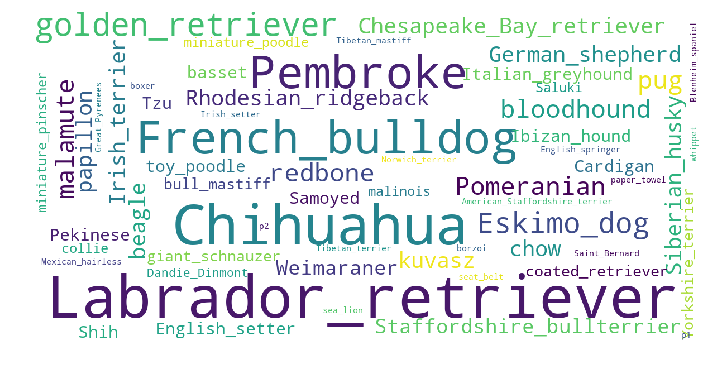

In [87]:
textviz(twitter_archive_master[['p1','p2','p3']])


**Viz of the text column**

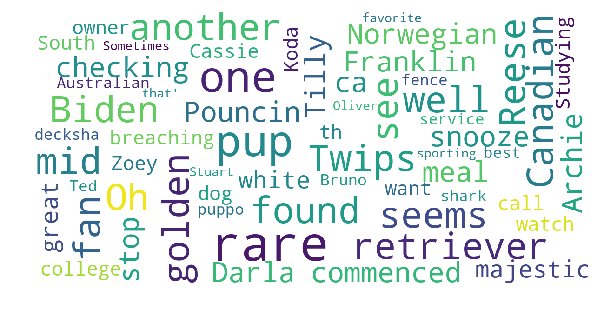

In [109]:
textviz(twitter_archive_master['text'])

Above are the handlers most used words in terms of Adjectives (majestic,favorite),Dog names(Franklin,Biden)and Dog stages(puppo,pup)

In [116]:
value =twitter_archive_master['source'].value_counts()
print(value)


Twitter for Iphone    1572
Twitter Web Client      22
TweetDeck                6
Name: source, dtype: int64


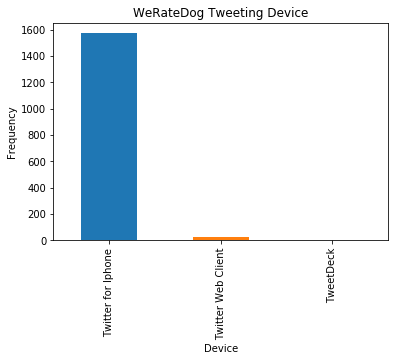

In [118]:
value.plot(kind='bar',title="WeRateDog Tweeting Platforms");
plt.xlabel('Device');
plt.ylabel('Frequency');


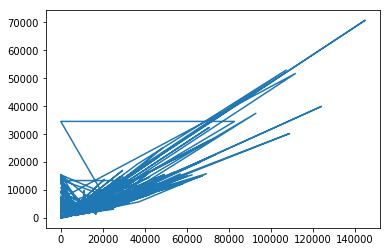

In [88]:
plt.plot(twitter_archive_master['likes'], twitter_archive_master['retweets'])

Text(0.5,0,'Months')

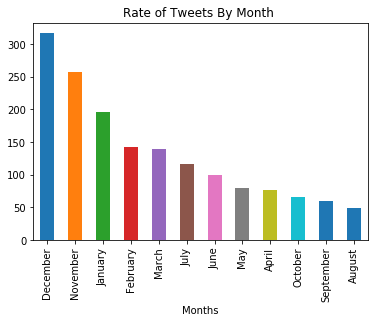

In [92]:
value=twitter_archive_master['month'].value_counts()
value.plot(kind='bar',title='Rate of Tweets By Month ');
plt.xlabel('Months')

Monday       270
Tuesday      236
Thursday     232
Wednesday    232
Friday       231
Sunday       205
Saturday     194
Name: day, dtype: int64


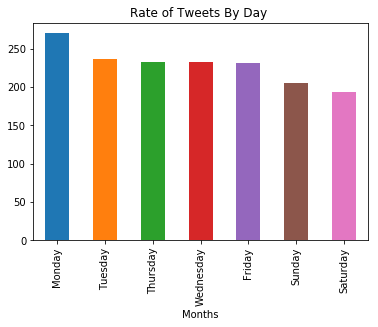

In [95]:
value=twitter_archive_master['day'].value_counts()
print(value)
value.plot(kind='bar',title='Rate of Tweets By Day ');
plt.xlabel('Months');

In [ ]:
The tweet rate among the days are somewhat  evenly spread out. 

### Insights:
1. The Top dog breeds posted on WeRateDogs are the; <br>
    a. **labrador retriever** <br>
    b. **French Bulldog** <br>
    c. **Chihuaha** <br>
    d. **Pembroke** and <br>
    e  **Eskimo Dog**
   
2. The Handlers most used  Device for tweeting is an Iphone .
3. December has the highest tweet rates ,followed by November.
5. Day doesnt implicitly affect tweet rate